# Collisional ionization / three-body recombination

- formula:
  - collisional ionization: [Hahn 1997](https://doi.org/10.1016%2FS0375-9601(97)00287-9)
  - three-body recombination: [Hahn 1997](https://doi.org/10.1016%2FS0375-9601(97)00287-9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [2]:
elements = [
    lss.O1Inasan(),
    lss.O2Inasan(),
]
"""
13S3S - fast level
12P1D4 - 
"""
elements[0].keys = elements[0].all_keys; elements[1].keys = elements[1].all_keys

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
population_nlte_1[0] = 1.0

count = int(10)
temperatures = np.full(count, 1.0e4)
electron_temperatures = np.full(count, 1.0e4)
electron_number_densities = np.linspace(1.0e1, 1.0e10, num=count)

delta_time = 0.01

In [3]:
ce_balance = ["ci_hahn", "tbr_hahn"]

b_factors = calculate_b_factors(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    delta_time=delta_time,
    transitions_types=[
        *ce_balance,
    ]
)

/tmp/ipykernel_105313/2787939790.py:5: RuntimeWarning: divide by zero encountered in log10
  np.log10(b_factors.T[i]),


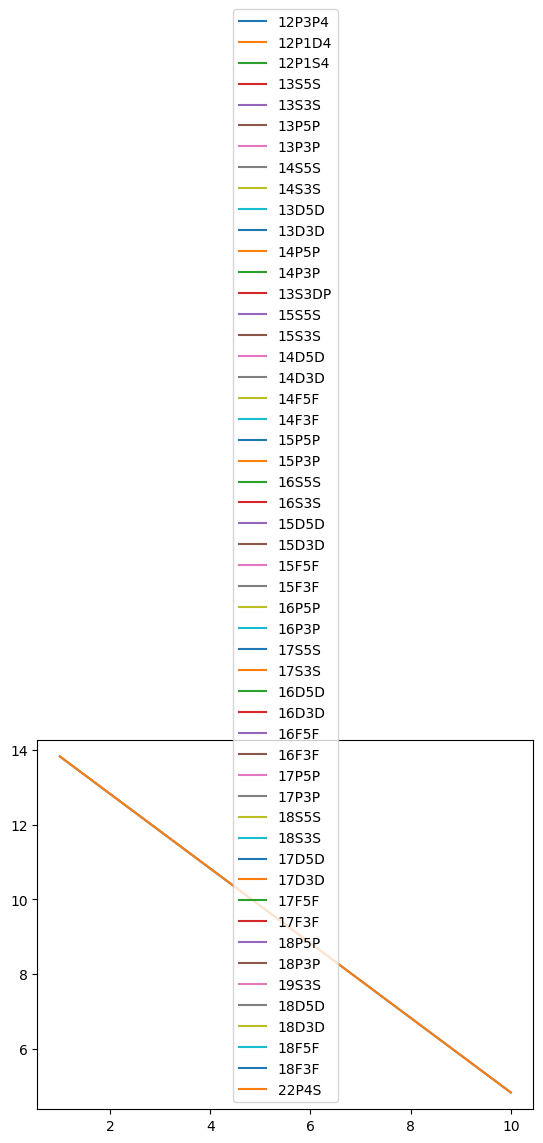

In [4]:
for element in elements:
    for i, key in enumerate(element.keys):
        plt.plot(
            np.log10(electron_number_densities),
            np.log10(b_factors.T[i]),
            label=key,
        )
plt.legend()
plt.show()